# 11.Disparitná mapa

In [13]:
from skimage import data,color,io
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import trange, tqdm
from skimage import feature

In [4]:
#img_left, img_right, disparity = data.stereo_motorcycle()
#img_right = color.rgb2gray(img_right)
#img_left = color.rgb2gray(img_left)

img_right = io.imread('imgs/tsukubaright.jpg')
img_left = io.imread('imgs/tsukubaleft.jpg')

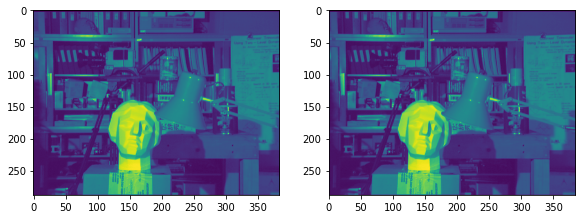

In [6]:
plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(img_left)
plt.subplot(132)
plt.imshow(img_right)
#plt.subplot(133)
#plt.imshow(disparity)

In [8]:
height, width = img_right.shape
disp_min = 0
disp_max = 16
windows_size = 9
disp_map = np.zeros((height,width))
w = windows_size // 2
mode  = "hamming"

In [9]:
for i in tqdm(range(w,height),'Row progress'):
    for j in range(w,width-disp_max-w):
        min_val = np.inf
        position = 0
        right_window = img_right[i-w:i+w,j-w:j+w]
        for k in range(disp_min,disp_max):
            left_window  = img_left[i-w:i+w,j-w+k :j+w+k]
            if mode == "norm":
                dif = np.sum((left_window - right_window) **2) ** (1/2)
            elif mode == "abs":
                dif = np.sum(np.abs(left_window - right_window))
            elif mode == "square":
                dif = np.sum((left_window - right_window) **2)
            elif mode == "hamming":
                xor = np.bitwise_xor((right_window*255).astype(np.uint8),
                                     (left_window*255).astype(np.uint8))
                bit_dif = np.unpackbits(xor)
                dif  = np.sum(bit_dif)
            if min_val > dif:
                min_val = dif
                position = k
        disp_map[i,j] = position

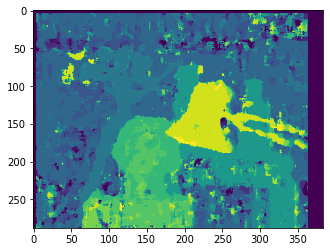

In [10]:
plt.imshow(disp_map)

# D.U. dokoncit podla knihy

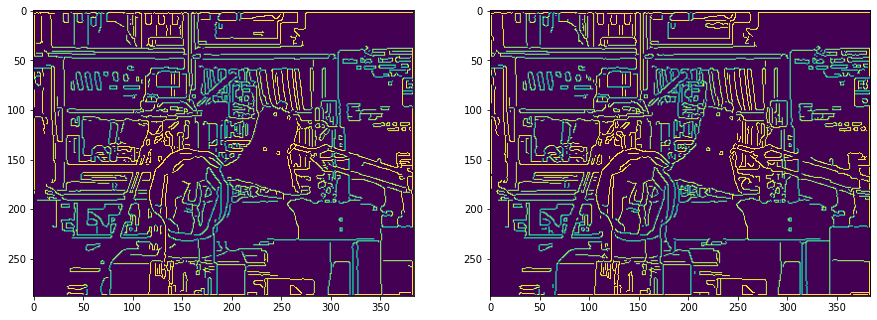

In [14]:
img_right_edge = feature.canny(img_right)
img_left_edge = feature.canny(img_left)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(img_left_edge)
plt.subplot(122)
plt.imshow(img_right_edge)

In [15]:
windows_size = 19
w = windows_size // 2
disp_map = np.zeros((height,width))

for i in tqdm(range(w,height),'Row progress'):  # (w,height)
    for j in range(w,width-disp_max-w):  # (w,width-disp_max-w)
        kernel = img_right_edge[i-w:i+w,j-w:j+w]
        max_value = 0
        position = 0
        for k in range(disp_min,disp_max):
            left_window = img_left_edge[i-w:i+w,j-w+k:j+w+k]
            value = np.sum(np.multiply(kernel, left_window))
            if max_value < value:
                max_value = value
                position = k
        disp_map[i,j] = position

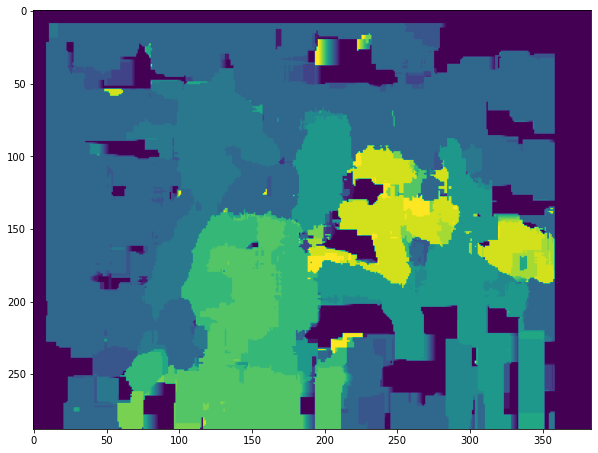

In [16]:
plt.figure(figsize=(10,10))     
plt.imshow(disp_map)
